In [81]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization

In [32]:
#ładowanie danych i utworzenie data frame'u

tumor_dir_path='C://Users//jk/Desktop//data science - infoshare//projekt_SQL//jdszr4-edc//4-projekt-dl//Brain Tumor Data Set//Brain Tumor'
non_tumor_path='C://Users//jk/Desktop//data science - infoshare//projekt_SQL//jdszr4-edc//4-projekt-dl//Brain Tumor Data Set//Healthy'
filepaths = []
labels= []
dict_list = [tumor_dir_path, non_tumor_path]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('brain_tumor')
        else:
          labels.append('good_health') 
    
fpath_s = pd.Series(filepaths, name="filepaths")
lbl_s = pd.Series(labels, name="lbl")
tumor_data = pd.concat([fpath_s,lbl_s], axis=1)
df = pd.DataFrame(tumor_data)
print(df["lbl"].value_counts())

brain_tumor    2513
good_health    2087
Name: lbl, dtype: int64


In [33]:
df.shape

(4600, 2)

# TRAIN TEST SPLIT

In [70]:
train_images, test_images = train_test_split(df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(3680, 2)
(1380, 2)
(920, 2)
(3220, 2)


In [36]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="lbl",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="lbl",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="lbl",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 3220 validated image filenames belonging to 2 classes.
Found 1380 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


# MODEL

In [42]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation="relu", padding="same",
               input_shape=(244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#adding flatten layer
model.add(BatchNormalization())
model.add(Flatten())

#adding dense layers with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))

#Output layer
model.add(Dense(2, activation="softmax"))

In [44]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 244, 244, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 122, 122, 32)      128       
_________________________________________________________________
flatten_4 (Flatten)          (None, 476288)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               60964992  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

# TRENING

In [51]:
History = model.fit(train, validation_data= val, epochs=15,verbose=1)

Epoch 1/15
101/101 [==============================] - 274s 3s/step - loss: 0.3742 - accuracy: 0.8255 - val_loss: 0.3307 - val_accuracy: 0.8772
Epoch 2/15
101/101 [==============================] - 256s 3s/step - loss: 0.4319 - accuracy: 0.7693 - val_loss: 0.4607 - val_accuracy: 0.8837
Epoch 3/15
101/101 [==============================] - 270s 3s/step - loss: 0.3496 - accuracy: 0.8512 - val_loss: 0.4961 - val_accuracy: 0.8891
Epoch 4/15
101/101 [==============================] - 248s 2s/step - loss: 0.4011 - accuracy: 0.8484 - val_loss: 0.5264 - val_accuracy: 0.8946
Epoch 5/15
101/101 [==============================] - 301s 3s/step - loss: 0.3693 - accuracy: 0.8463 - val_loss: 0.5400 - val_accuracy: 0.8913
Epoch 6/15
101/101 [==============================] - 250s 2s/step - loss: 0.3127 - accuracy: 0.8683 - val_loss: 0.6130 - val_accuracy: 0.9043
Epoch 7/15
101/101 [==============================] - 276s 3s/step - loss: 0.2970 - accuracy: 0.8714 - val_loss: 0.6478 - val_accuracy: 0.9033

# Wykresy Loss i Accuracy

In [54]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

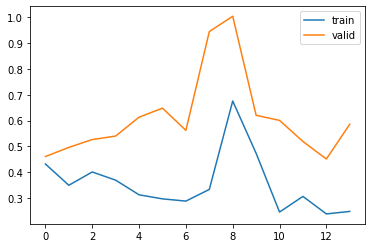

In [55]:
plt.plot(History.history['loss'][1:])
plt.plot(History.history['val_loss'][1:])
plt.legend(['train', 'valid'])
plt.show();

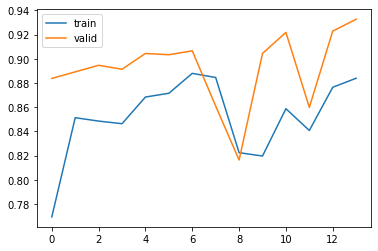

In [56]:
plt.plot(History.history['accuracy'][1:])
plt.plot(History.history['val_accuracy'][1:])
plt.legend(['train', 'valid'])
plt.show();

# TEST

In [98]:
y_pred = model.evaluate(test, verbose=1)

44/44 [==============================] - 19s 436ms/step - loss: 0.4842 - accuracy: 0.9341
